# Ford GoBike Data Analysis 2019
## by Adnan Aldajani

## Investigation Overview

My main goal of this presentation is to compare the genders in the dataset and see what gender uses the service and what gender have more trip duration. Also, to have a look on the performance of the service in various days of the week.

## Dataset Overview

The data is a data of Ford bike rental service in  San Francisco Bay Area in 2019. It shows timing of start to end of the rental trip, start and end startion and which bike is used.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('clean-master-dataframe.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Differenece Between Number of Users of Different Genders

Before the start of the analysis, we want to check relation between number of users to the gender of the user. We can see that the proportion of males is very high compared to females and other genders.

Text(0.5, 1.0, 'Number of Users of Different Genders')

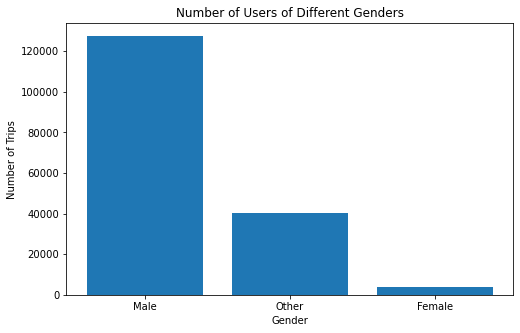

In [8]:
x = df_clean.member_gender.unique()
y = df_clean.member_gender.value_counts()
plt.figure(figsize=[8, 5])
plt.bar(x,y);
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.title('Number of Users of Different Genders')


## Duration of Trips in the Days of the Week

Now, We want to check how each day of the week do in terms of durations. We can see that Sundays and Saturday tend to have more duration than others.

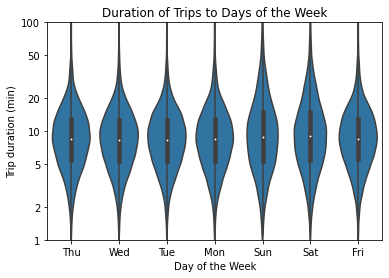

In [11]:
df_clean['log_duration'] = np.log10(df_clean.duration_min)
g = sb.violinplot(data = df_clean, x = 'start_day', y = 'log_duration', color=sb.color_palette()[0], size= 5, col_wrap = 2);
g.set_title('Duration of Trips to Days of the Week')
g.set_xlabel('Day of the Week')
g.set_ylabel('Trip duration (min)')
g.set_yticks(np.log10(np.array([1, 2, 5, 10, 20, 50, 100])));
g.set_yticklabels([1, 2, 5, 10, 20, 50, 100]);
g.set_ylim([0,2]);


## Trip Duration, Gender and Age Relation

Now that we know he gender proportions in the dataframe, we want to check the duration to age relation for every gender in the dataframe. Although males are much more than females in the dataset, it is noted that females tend to have more duration time compared to males.

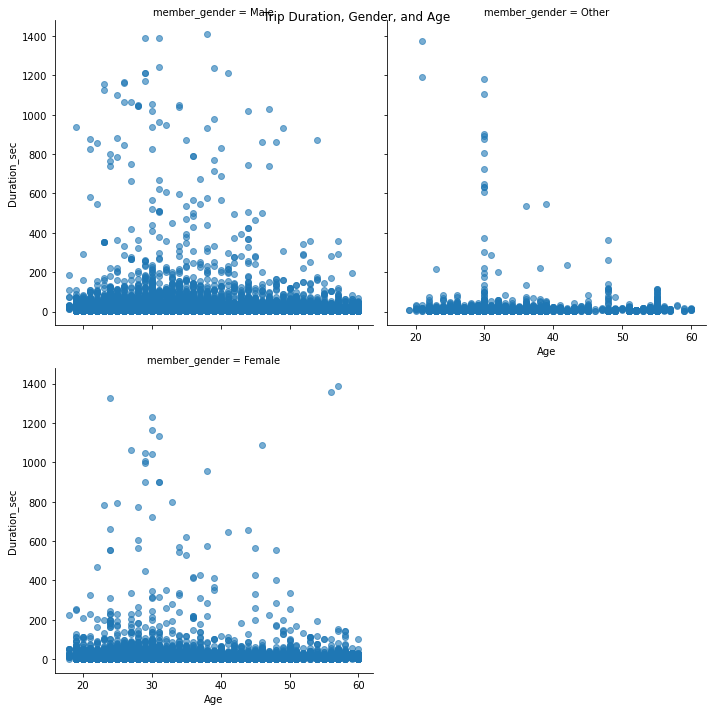

In [16]:
gender = sb.FacetGrid(data = df_clean, col = 'member_gender', col_wrap = 2, size = 5)
gender.map(plt.scatter, 'member_age', 'duration_min', alpha= 0.6)

gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
gender.fig.suptitle('Trip Duration, Gender, and Age')
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!